**Sales Visualization using Matplotlib & Seaborn**

This notebook contains visual exploration of sales data using Python, Pandas, Matplotlib, and Seaborn.

**Import libraries and data**

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt

#import data
data = pd.read_excel("Sample - Superstore.xlsx")

**Get data info summary**

In [2]:
#get all the summarized information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

**Line chart**

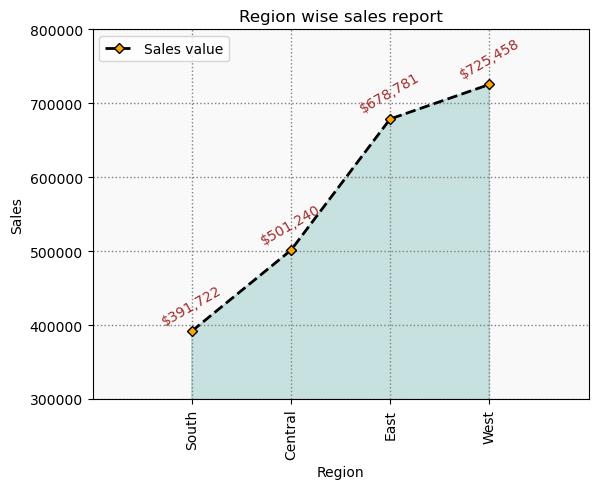

In [3]:
#create region wise sales report with line chart
df1 = data.groupby('Region')['Sales'].sum()                          # summation of region wise sales
df1 = df1.sort_values(ascending=True)                                # sort values before plotting a chart
plt.plot(df1.index,                                                  # define x axis 
        df1.values,                                                  # define y axis
         color="black",                                              # set color of line
         linestyle='--',                                             # set type of line
         linewidth=2,                                                # set width of line
         marker='D',                                                 # set diamond shaped marker at each data point
         markersize=5,                                               # set marker size
         markerfacecolor='orange',                                   # fill inside of marker with Orange color
         markeredgecolor='black',                                    # set marker border with black color
         label="Sales value")                                        # set legend

#set a label for each marker with it's value
y_offsets = [5000, 5000, 5000, 5000]                                 # set offset along y axis for value lable of each marker 

for (x, y, offset) in zip(df1.index, df1.values, y_offsets):         # looping through Region and Sales
    plt.text(x, y + offset,                                          # function for a text label                                
             f"${y:,.0f}",                                           # f-string formatting to converts the numeric sales value y into a string with comma separators and no decimal points
             ha='center',                                            # horizintal alignment of a text
             va='bottom',                                            # vertical alignment of a text
             fontsize=10,                                            # set a font size for a marker label
             color='brown',                                          # set a color for a marker label
             rotation = 30)                                          # rotate marker label by 30 degrees 

plt.title("Region wise sales report")                                # set title of the chart
plt.xlabel("Region")                                                 # set label for x axis
plt.xticks(rotation=90)                                              # rotate x axis label by 90 degrees
plt.ylabel("Sales")                                                  # set label for y axis
plt.legend(loc = 'upper left') 	                                     # set location of a legend to upper left	
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)             # set parameters of the grid
plt.xlim(-1,4)                                                       # set range of values shown on x axis with padding on left & right
plt.ylim(300000,800000)                                              # set range of values on y axis
plt.gca().set_facecolor("#f9f9f9")                                   # light background for contrast
plt.box(True)                                                        # show border around plot
plt.fill_between(df1.index, df1.values, color='teal', alpha=0.2)     # fill area under the line

plt.show()                                                           # display the chart

**Bar chart**

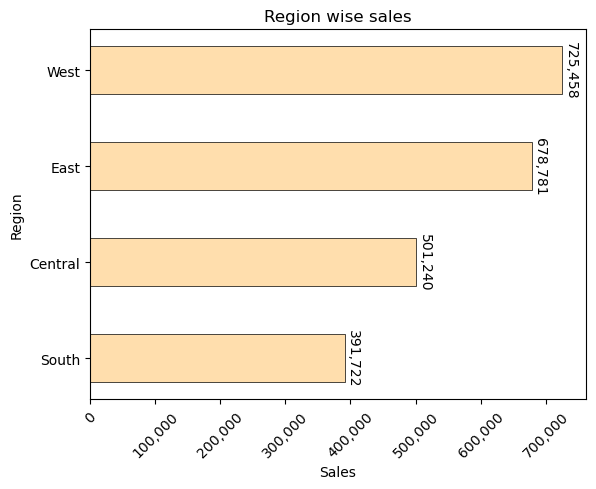

In [4]:
from matplotlib.ticker import FuncFormatter                        # matplotlib.ticker module that handles tick mark formatting
                                                                   # FuncFormatter lets you apply a custom function to format axis values

# format bar labels
for i, v in enumerate(df1.values):                                 # loop through sales values
    plt.text(v + 2000,                                             # offset on x axis
             i,                                                    # set y axis text aligning with each bar
             f"{v:,.0f}",                                          # format number
             va='center',                                          # set bar label vartically centre aligned
             fontsize=10,                                          # set bar label font size
             color='black',                                        # set bar label color
            rotation = -90)                                        # set positioning of bar label

# set a label for each bar with it's value
plt.barh(df1.index,                                                # horizontal bar chart & define x axis
        df1.values,                                                # define y axis
        color = "navajowhite",                                     # define fill color of the bar
        edgecolor="black",                                         # define edge color of the bar     
        linewidth= 0.5,                                            # define thickness of outline of the bar 
        height = 0.5)                                              # define thickness of the bar

# format x axis tick labels
plt.gca().xaxis.set_major_formatter(                               # get current axis object, modify x axis ticks, apply formatting to x axis ticks 
    FuncFormatter(lambda x, p: format(int(x), ',')))               # convert number to comma format

plt.xlabel("Sales")                                                # set label for x axis          
plt.xticks(rotation=45)                                            # rotate x axis label by 45 degrees
plt.ylabel("Region")                                               # set label for y axis
plt.title("Region wise sales")                                     # set label of the bar chart
plt.show()                                                         # display the chart

**Pie chart**

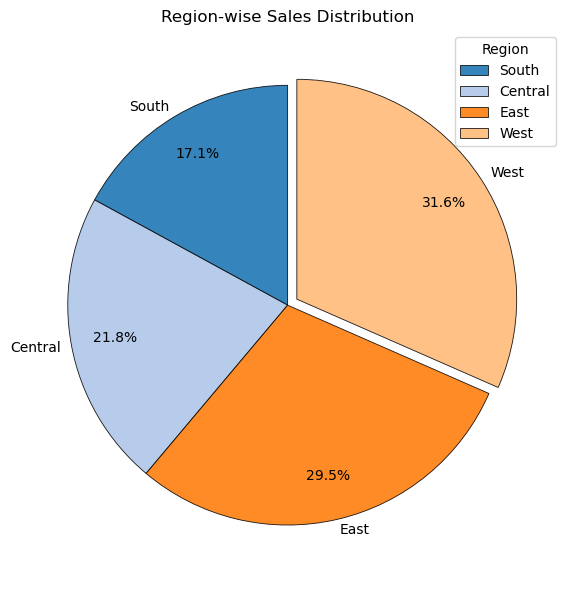

In [5]:
plt.figure(figsize=(6,6))                                  # create new figure and set width & height of the chart

# pop-out highest value 
max_index = df1.values.argmax()                            # find the index of highest value
explode = [0.05 if i == max_index                          # create explode list: 0.05 only for max index
           else 0 for i in range(len(df1))]                # else 0

plt.pie(df1.values,                                        # define values
        labels=df1.index,                                  # define label of slices
        autopct='%3.1f%%',                                 # format text inside slices
        startangle=90,                                     # rotate the pie chart so the first slice starts at 12 o'clock
        explode=explode,                                   # apply explode effect as defined above
        pctdistance=0.8,                                   # define the distance of the percentage label from the center
        labeldistance= 1.05,                               # set the distance of region names

        # set appearance of slices
        wedgeprops={
            "edgecolor":"black",                           # set edge color
            "linewidth":0.6,                               # set thickness of outline
            "alpha":0.9},                                  # set transparency
        colors=plt.colormaps['tab20'](range(len(df1))))     # set color of slices

plt.title("Region-wise Sales Distribution")                # set title of the chart
plt.legend(loc="best", title="Region")                     # add legend to define regions

plt.tight_layout()                                         # auto adjust layout
plt.show()                                                 # display the chart

**Histogram chart**

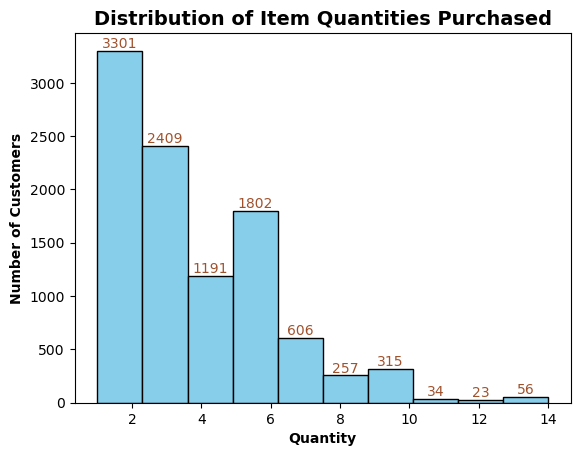

In [82]:
# get counts and boundaries of bins for setting label
counts, bins, _ = plt.hist(data["Quantity"], bins=10)                                 # get three values: 
                                                                                        # number of items in each bin
                                                                                        # edges of each bin
                                                                                        # rectangle objects representing bars (not used)

# for loop for label of the each bar
for count, left, right in zip(counts, bins[:-1], bins[1:]):                           # loop through height and left & right edge of each var
    x_center = (left + right) / 2                                                     # calculate the mid point of each bar
    plt.text(x_center, count, int(count),                                             # set parameters of text label, x-value, y-value, ensure numbers in int format       
             color="sienna",                                                           # set color of the label
             ha='center', va='bottom')                                                # set x & y position of the label

plt.hist(data["Quantity"],                                                            # pass the data to histogram 
         bins = 10,                                                                   # define number of bins
         color = 'skyblue',                                                           # define fill color of the bar 
         edgecolor = 'black')                                                         # define edge color of the bar
plt.xlabel("Quantity", fontsize=10, weight = 'bold')                                  # define x axis label and its parameters
plt.ylabel("Number of Customers", fontsize=10, weight = 'bold')                       # define y axis label and its parameters
plt.title("Distribution of Item Quantities Purchased", fontsize=14, weight='bold')    # defind title of the chart and its parameters
plt.show()                                                                            # display the chart

- This histogram shows how many items customers typically purchase. 
- Most customers buy between 1 to 3 units, while higher purchase quantities (8 or more) occur much less frequently.

**Scatter plot**

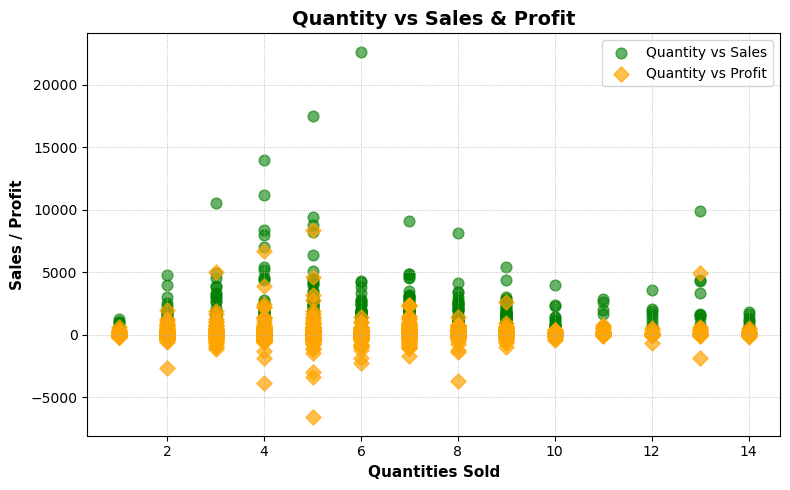

In [86]:
plt.figure(figsize=(8,5))                                               # define figure size

# scatter plot 1
plt.scatter(data["Quantity"],                                           # define x axis as Quantity                   
            data["Sales"],                                              # define y axis as Sales
            color='green',                                              # define color of the dots
            marker='o',                                                 # define shape of the dot as circle
            alpha=0.6,                                                  # define transparency of the dots
            s=60,                                                       # define size of the dots
            label="Quantity vs Sales")                                  # label of the legend

# scatter plot 2
plt.scatter(data["Quantity"],                                           # define x axis as Quantity
            data["Profit"],                                             # define y axis as Profit
            color='orange',                                             # define color of the dots
            marker='D',                                                 # define shape of the dot as diamond
            alpha=0.7,                                                  # define transparency of the dots
            s=60,                                                       # define size of the dots
            label="Quantity vs Profit")                                 # label of the legend


plt.grid(True, linestyle=':', linewidth=0.6)                            # define grid lines
plt.xlabel("Quantities Sold", fontsize=11, weight='bold')               # define x axis label and its parameters
plt.ylabel("Sales / Profit", fontsize=11, weight='bold')                # define y axis label and its parameters
plt.title("Quantity vs Sales & Profit", fontsize=14, weight='bold')     # define title of the chart and its parameters
plt.legend(loc='upper right', fontsize=10)                              # define position of the legend
plt.tight_layout()                                                      # autmatically adjusts the spacing
plt.show()                                                              # display the chart

- This scatter plot compares the relationship between quantities sold and corresponding sales and profit values.
- Sales (green markers) generally increase with higher quantities, while profit (orange markers) shows greater variability — including both gains and losses.
- This indicates that higher quantity does not always guarantee higher profit.

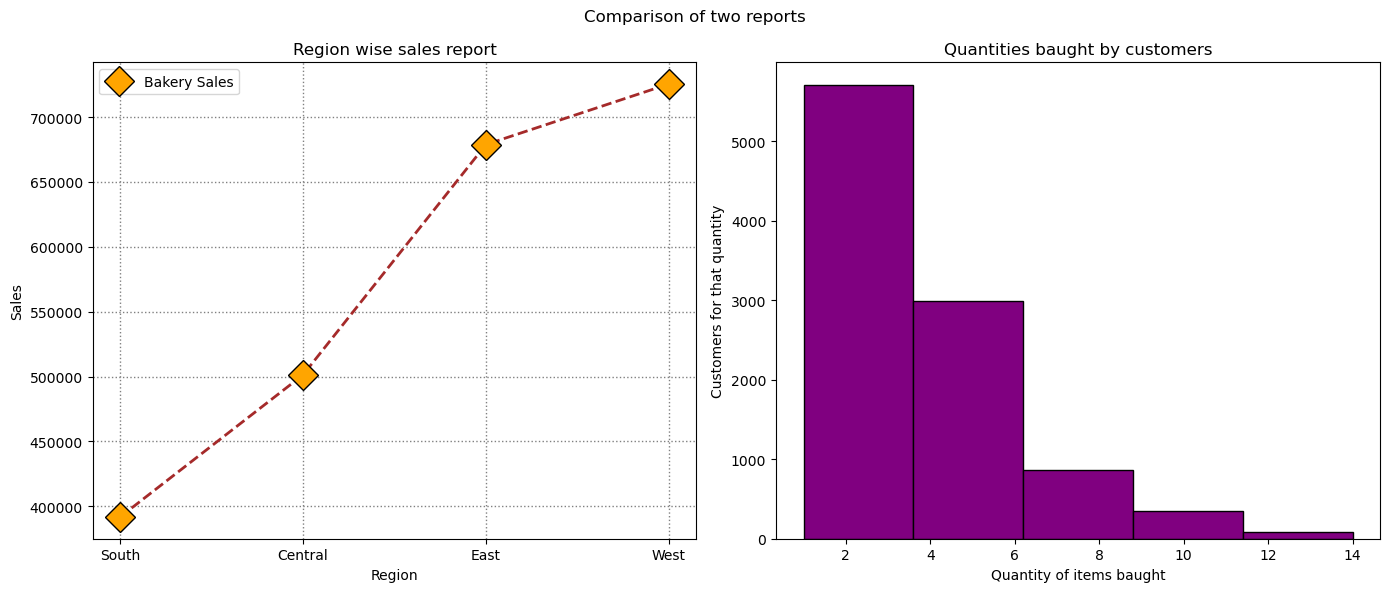

In [6]:
fig, ax = plt.subplots(1,2,figsize=(14,6))                          # create a figure with two sub plots

ax[0].plot(df1.index,                                               # create a line chart on the first subplot and define x
         df1.values,                                                # define y axis values
         color="brown",                                             # define line color
         linestyle='--',                                            # define line style
         linewidth=2,                                               # define line width
         marker='D',                                                # define style of the marker
         markersize=15,                                             # define marker size
         markerfacecolor='orange',                                  # fill the color in marker
         markeredgecolor='black',                                   # define marker outline
         label="Bakery Sales")                                      # define lable used in the legend

ax[0].set_title("Region wise sales report")                         # titel of first subplot
ax[0].set_xlabel("Region")                                          # x axis label
ax[0].set_ylabel("Sales")                                           # y axis label
ax[0].legend(loc = 'upper left') 	                                # define position of the legend
ax[0].grid(color = 'grey', linestyle = ':', linewidth = 1)          # define properties of the grid

ax[1].hist(data["Quantity"],                                        # create a histogram chart on the second subplot and define data column used for the histogram
         bins = 5,                                                  # divide data into 5 groups
         color = 'purple',                                          # fill color of bars
         edgecolor = 'black')                                       # outline of bars
ax[1].set_xlabel('Quantity of items baught')                        # x axis label
ax[1].set_ylabel('Customers for that quantity')                     # y axis label
ax[1].set_title('Quantities baught by customers')                   # title of the chart

fig.suptitle("Comparison of two reports")                           # main title of the entire figure
plt.tight_layout()                                                  # automatically adjusts spacing between subplots
plt.show()                                                          # display the chart